可以在[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)获取纸制版和电子版的*Think Python 3e*.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# 返回值

在之前的章节，我们使用过内建的函数（如`abs`和`round`），模块中的函数（如`sqrt`和`pow`）。当你调用这些函数时，它将返回值，你可以用返回的值赋值给变量，或者作为表达式的一部分。

我们目前自己写的函数不同。有些使用`print`函数来打印值，有些使用海龟函数来绘图。但它们不返回值。

本章我们将看到如何编写返回值的函数。

## 有些函数有返回值

当你调用类似`math.sqrt`的函数，它们的结果称为**返回值return value**。如果函数调用在单元格的最后一行，Jupyter将立刻显示返回值。

In [2]:
import math

math.sqrt(42 / math.pi)

3.656366395715726

如果你将返回值赋值给变量，函数的返回值则不会被显示。

In [3]:
radius = math.sqrt(42 / math.pi)

但你可以稍后进行显示：

In [4]:
radius

3.656366395715726

你也可以使用返回值作为表达式的一部分。

In [5]:
radius + math.sqrt(42 / math.pi)

7.312732791431452

以下是返回值的函数定义示例：

In [6]:
def circle_area(radius):
    area = math.pi * radius**2
    return area

`circle_area`接受`radius`作为半径，计算给定半径圆的面积。

最后一行是`return`语句，返回`area`的值。

如果我们像下面一样调用函数，Jupyter将显示返回值。

In [7]:
circle_area(radius)

42.00000000000001

我们可以将返回值赋值给变量：

In [8]:
a = circle_area(radius)

或者将返回值作为表达式的一部分：

In [95]:
circle_area(radius) + 2 * circle_area(radius / 2)

同样，我们也可以查看被返回值赋值变量的值：

In [9]:
a

42.00000000000001

但我们不能访问`area`变量。

In [10]:
%%expect NameError

area

NameError: name 'area' is not defined

`area`是函数中的局部变量，我们无法在函数外部访问。

## 有些函数返回None

如果函数没有`return`语句，它将返回`None`。`None`和`True`与`False`类似，也是一个特殊的值。例如，以下是第3章的`repeat`函数：

In [11]:
def repeat(word, n):
    print(word * n)

如果我们像下面一样调用它，将展示“Finland”歌词的第1行：

In [12]:
repeat('Finland, ', 3)

Finland, Finland, Finland, 


该函数使用`print`显示字符串的值，但它本身不使用`return`语句返回值。如果我们将结果赋值给变量，它也会显示字符串的值。

译注：与之前章节的描述不同，赋值语句实际上可能会有可见的影响。

In [13]:
result = repeat('Finland, ', 3)

Finland, Finland, Finland, 


如果我们打印变量的值，不会显示任何信息：

In [14]:
result

`result`实际上有值，但Jupyter不会显示它。我们可以像这样显示它的值：

In [15]:
print(result)

None


`repeat`函数的返回值为`None`。

下面是与`repeat`类似的函数，不同的是它有返回值。

In [16]:
def repeat_string(word, n):
    return word * n

注意我们可以在`return`语句中使用表达式，而不只是变量。

我们可以用这个版本的函数返回值赋值给变量。当函数运行时，它不会显示任何东西。

In [17]:
line = repeat_string('Spam, ', 4)

但我们可以显示赋值给`line`变量的值：

In [18]:
line

'Spam, Spam, Spam, Spam, '

只返回值，不显示任何东西或者有其他影响的函数称为**纯函数pure function**。

## 返回值和条件

如果Python不提供`abs`函数，我们可以像这样编写它：

In [19]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

若`x`为负数，执行第一个分支，第一个`return`语句返回`-x`的值，函数立刻结束；否则，执行第二个分支，第二个`return`语句返回`x`的值，函数结束。这个函数是正确的。

然而，如果你在条件语句中使用了`return`语句，你需要确保每个可能的分支都可以通往`return`语句。例如以下是`absolute_value`的错误版本。

译注：这个要求是对纯函数的要求。纯函数从设计目的上必须返回值。

In [20]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

把`0`作为参数调用函数时，将发生：

In [21]:
absolute_value_wrong(0)

我们没有得到任何东西！问题在于：当`x`为0时，没有一个条件正确，函数没有遇到任何`return`语句，因此返回值为`None`，所以Jupyter不会显示任何东西。

另外一个错误版本的`absolute_value`在函数定义结尾有额外的`return`语句：

In [109]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x
    
    return '这是死代码(dead code)。'

如果`x`为负数，执行第一个`return`语句，函数结束；否则执行第二个`return`语句，函数结束。无论如何，都无法到达第三个`return`语句，这个语句永远不会执行。

永远不会执行的代码称为**死代码dead code**。总体而言，死代码没有害处，但通常表明你对程序存在误解，也可能会让其他尝试理解程序的人感到困惑。

## 增量开发

当你编写更大的函数时，你可能发现你花了更多时间调试。用处理日益增长的复杂程序，你可能需要尝试**增量开发incremental development**，一次增加一小部分代码并进行测试。

比如，假设你想要算出坐标为$(x_1, y_1)$和$(x_2, y_2)$的两点之间的距离。距离公式为：

$$\mathrm{distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

第一步需要考虑，在Python中`distance`函数应该是怎样的，即输入（形参）和输出（返回值）是什么？

对于这个函数，输入是点的坐标，输出值是距离。你可以立刻编写函数的框架：

In [22]:
def distance(x1, y1, x2, y2):
    return 0.0

这个版本还没有计算距离，它总是返回0。但它是一个有返回值的完整函数，你可以在它变得更复杂之前进行测试。

要测试新函数，我们用以下样本参数进行调用：

In [23]:
distance(1, 2, 4, 6)

0.0

我选择这些值，让水平距离为`3`，垂直距离为`4`。结果应该为`5`，对应`3-4-5`直角三角形的斜边。当测试函数时，知道正确答案会很有用。

在这时我们确认了函数可以运行，并返回了值。我们可以开始在函数体中添加代码。

下一步，计算`x2 - x1`和`y2 - y1`的值是合理的。以下是使用临时变量存储这些值并显示它们的一版函数：

In [25]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    print('x的差值dx是', dx)
    print('y的差值dy是', dy)
    return 0.0

如果函数正常生效，应该显示`x的差值dx是3`和`y的差值dy是4`。如果确实如此，那么函数获得了正确的参数，并正确执行了第一步计算。否则，也只需要检查很少的几行代码。

In [26]:
distance(1, 2, 4, 6)

x的差值dx是 3
y的差值dy是 4


0.0

目前为止进展不错。下一步我们计算`dx`和`dy`的平方和：

In [27]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    print('距离的平方和dsquared为: ', dsquared)
    return 0.0

再次，我们可以调用函数并检查输出，结果应该为25。

In [28]:
distance(1, 2, 4, 6)

距离的平方和dsquared为:  25


0.0

最后，我们可以使用`math.sqrt`计算距离：

In [29]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    print("结果为", result)

并进行测试：

In [30]:
distance(1, 2, 4, 6)

结果为 5.0


结果正确，但这个版本打印结果而不是返回结果，所以返回值是`None`。

通过将`print`函数替换为`return`语句可以修复这个问题。

In [31]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    return result

这个版本的`distance`是纯函数。如果我们像下面一样调用函数，只会显示结果。

In [32]:
distance(1, 2, 4, 6)

5.0

如果我们将结果赋值给变量，不会显示任何信息。

In [33]:
d = distance(1, 2, 4, 6)

我们编写的`print`语句对于调试很有用，但一旦函数正常工作，我们就可以移除它。这种代码称为**脚手架scaffolding**，它对构建代码很有用，但不是最终成品的一部分。

这个例子展示了增量开发过程。该过程的核心步骤为：

1. 从可以运行的程序开始，做出小的改变，然后在每次改变后进行测试；
2. 使用变量维护临时的值，以便展示和检查；
3. 当程序编写完成，移除脚手架。

在任何时候，如果出现了错误，它出现的位置通常是你刚做出改变的位置。增量更新可以节省很多调试时间。

## 布尔函数

函数可以返回布尔值`True`与`False`，便于将复杂测试封装进函数中。例如`is_divisible`检查`x`能否被`y`整除。

In [34]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

译注：返回布尔值的函数名习惯上为“is_实词”。

以下是调用该函数的示例：

In [35]:
is_divisible(6, 4)

False

In [36]:
is_divisible(6, 3)

True

在函数内，`==`运算符的结果是布尔值，所以我们可以更简洁地编写函数，直接返回这个表达式。

In [37]:
def is_divisible(x, y):
    return x % y == 0

布尔函数通常用在条件语句中：

In [39]:
if is_divisible(6, 2):
    print('可以被整除')

可以被整除


你可能会写这样的语句：

In [40]:
if is_divisible(6, 2) == True:
    print('可以被整除')

可以被整除


但是这个比较是没有必要的。

## 用返回值进行递归

既然我们可以编写有返回值的函数，就可以编写有返回值的递归函数。有了这种能力，我们就通过了一个重要的门槛，我们目前介绍的Python的子集是**图灵完备Turing complete**的，即我们可以执行任何算法描述的计算。

要展示带有返回值的递归函数，我们将计算几个递归定义的数学问题。递归的定义类似于循环定义，因为定义指向被定义的事物。真正的循环定义并不有用：

> vorpal:形容词，描述某个东西很vorpal。

如果你看到词典中这样定义，你可能会生气。另一方面，如果你查看阶乘函数(用$!$符号表示)的定义，你可能会得到以下描述：

$$\begin{aligned}
0! &= 1 \\
n! &= n~(n-1)!
\end{aligned}$$ 

这个定义说$0$的阶乘是$1$，其他$n$的阶乘是用$n$乘以$n-1$的阶乘。

如果你能够写出某个事物的递归定义，你就可以编写Python程序来计算它。按照增量开发过程，我们将定义一个函数，接受`n`为参数，总是返回`0`。

In [41]:
def factorial(n):
    return 0

现在让我们开始第一部分的定义，如果参数恰好为`0`，我们只需要返回`1`：

In [42]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return 0

现在让我们填充第二部分，如果`n`不为`0`，我们需要进行递归调用，计算`n-1`的阶乘，并乘以`n`：

In [43]:
def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        return n * recurse

这个程序的执行流程与第5章的`countdown`类似。如果我们用参数`3`调用`factorial`：

由于`3`不为`0`，我们接受第2个分支，计算`n-1`的阶乘\...

> 由于`2`不为`0`，我们接受第2个分支，计算`n-1`的阶乘\...
>
> > 由于`1`不为`0`，我们接受第2个分支，计算`n-1`的阶乘\...
> >
> > > 由于`0`等于`0`，我们接受第1个分支，返回`1`，不再递归调用
> >
> > 返回值`1`乘以`n`(`n`为`1`),返回结果`1`
>
> 返回值`1`乘以`n`(`n`为`2`),返回结果`2`

返回值`2`乘以`n`(`n`为`3`),返回结果`6`。结果`6`是整个函数调用过程的返回值。

下面的栈图显示了这个函数调用的序列。

In [45]:
from diagram import Frame, Stack, make_binding

main = Frame([], name='__main__', loc='left')
frames = [main]

ns = 3, 2, 1
recurses = 2, 1, 1
results = 6, 2, 1

for n, recurse, result in zip(ns, recurses, results):
    binding1 = make_binding('n', n)
    binding2 = make_binding('recurse', recurse)
    frame = Frame([binding1, binding2], 
                  name='factorial', value=result,
                  loc='left', dx=1.2)
    frames.append(frame)
    
binding1 = make_binding('n', n)
frame = Frame([binding1], name='factorial', value=1, 
              shim=1.2, loc='left', dx=1.4)
frames.append(frame)

stack = Stack(frames, dy=-0.45)

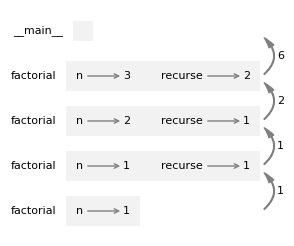

In [46]:
from diagram import diagram, adjust

width, height, x, y = [2.74, 2.26, 0.73, 2.05]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

返回值沿着栈向上传递。在每个帧中，返回值是`n`与`recurse`的乘积。

在最后一帧中，不存在局部变量`recurse`，因为没有执行创建该变量的分支。

## 信仰之跃

跟随程序执行流程是阅读程序的一种方式，但大量的代码很快就会淹没你。我把另一种可选方式称为“信仰之跃”。当你调用函数时，你*假设*函数能够正确工作，返回正确的值，而不是查看完整的执行流程。

实际上，你在使用内建函数时已经练习了“信仰之跃”过程。当你调用`abs`或`math.sqrt`时，你并不检查这些函数的函数体，你只是假设它们有效。

当你调用自己的函数时同样也在练习该过程。例如，之前我们编写了`is_divisible`函数来判断一个数能否被另一个数整除。当我们确信这个函数正确，我们就会直接调用它，不再查看函数体。

对于递归函数依然如此。当你进行递归调用时，你不应该跟随程序的执行流，而应该假定递归调用有效，然后问自己，“如果我可以计算$n-1$的阶乘，我能够计算$n$的阶乘吗？”阶乘函数的递归定义表明你可以通过乘以$n$来计算。

当然，在你还没写完函数之前就假定函数正确有些奇怪，但这也是为什么它叫作“信仰之跃”！

## Fibonacci

After `factorial`, the most common example of a recursive function is `fibonacci`, which has the following definition: 

$$\begin{aligned}
\mathrm{fibonacci}(0) &= 0 \\
\mathrm{fibonacci}(1) &= 1 \\
\mathrm{fibonacci}(n) &= \mathrm{fibonacci}(n-1) + \mathrm{fibonacci}(n-2)
\end{aligned}$$ 

Translated into Python, it looks like this:

In [132]:
def fibonacci(n):
    if n == 0:
        return 0
    elif  n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

If you try to follow the flow of execution here, even for small values of $n$, your head explodes.
But according to the leap of faith, if you assume that the two recursive calls work correctly, you can be confident that the last `return` statement is correct.

As an aside, this way of computing Fibonacci numbers is very inefficient.
In [Chapter 10](section_memos) I'll explain why and suggest a way to improve it.

## Checking types

What happens if we call `factorial` and give it `1.5` as an argument?

In [133]:
%%expect RecursionError

factorial(1.5)

It looks like an infinite recursion. How can that be? The function has a
base case -- when `n == 0`.
But if `n` is not an integer, we can *miss* the base case and recurse forever.

In this example, the initial value of `n` is `1.5`.
In the first recursive call, the value of `n` is `0.5`.
In the next, it is `-0.5`. 
From there, it gets smaller (more negative), but it will never be `0`.

To avoid infinite recursion we can use the built-in function `isinstance` to check the type of the argument.
Here's how we check whether a value is an integer.

In [134]:
isinstance(3, int)

In [135]:
isinstance(1.5, int)

Now here's a version of `factorial` with error-checking.

In [136]:
def factorial(n):
    if not isinstance(n, int):
        print('factorial is only defined for integers.')
        return None
    elif n < 0:
        print('factorial is not defined for negative numbers.')
        return None
    elif n == 0:
        return 1
    else:
        return n * factorial(n-1)

First it checks whether `n` is an integer.
If not, it displays an error message and returns `None`.



In [137]:
factorial('crunchy frog')

Then it checks whether `n` is negative.
If so, it displays an error message and returns `None.`

In [138]:
factorial(-2)

If we get past both checks, we know that `n` is a non-negative integer, so we can be confident the recursion will terminate.
Checking the parameters of a function to make sure they have the correct types and values is called **input validation**.

## Debugging

Breaking a large program into smaller functions creates natural checkpoints for debugging.
If a function is not working, there are three possibilities to consider:

-   There is something wrong with the arguments the function is getting -- that is, a precondition is violated.

-   There is something wrong with the function -- that is, a postcondition is violated.

-   The caller is doing something wrong with the return value.

To rule out the first possibility, you can add a `print` statement at the beginning of the function that displays the values of the parameters (and maybe their types).
Or you can write code that checks the preconditions explicitly.

If the parameters look good, you can add a `print` statement before each `return` statement and display the return value.
If possible, call the function with arguments that make it easy check the result. 

If the function seems to be working, look at the function call to make sure the return value is being used correctly -- or used at all!

Adding `print` statements at the beginning and end of a function can help make the flow of execution more visible.
For example, here is a version of `factorial` with print statements:

In [139]:
def factorial(n):
    space = ' ' * (4 * n)
    print(space, 'factorial', n)
    if n == 0:
        print(space, 'returning 1')
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        print(space, 'returning', result)
        return result

`space` is a string of space characters that controls the indentation of
the output. Here is the result of `factorial(3)` :

In [140]:
factorial(3)

If you are confused about the flow of execution, this kind of output can be helpful.
It takes some time to develop effective scaffolding, but a little bit of scaffolding can save a lot of debugging.

## Glossary

**return value:**
The result of a function. If a function call is used as an expression, the return value is the value of the expression.

**pure function:**
A function that does not display anything or have any other effect, other than returning a return value.


**dead code:**
Part of a program that can never run, often because it appears after a `return` statement.

**incremental development:**
A program development plan intended to avoid debugging by adding and testing only a small amount of code at a time.

**scaffolding:**
 Code that is used during program development but is not part of the final version.

**Turing complete:**
A language, or subset of a language, is Turing complete if it can perform any computation that can be described by an algorithm.

**input validation:**
Checking the parameters of a function to make sure they have the correct types and values

## Exercises

In [142]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

### Ask a virtual assistant

In this chapter, we saw an incorrect function that can end without returning a value.

In [ ]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

And a version of the same function that has dead code at the end.

In [ ]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x
    
    return 'This is dead code.'

And we saw the following example, which is correct but not idiomatic.

In [ ]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

Ask a virtual assistant what's wrong with each of these functions and see if it can spot the errors or improve the style.

Then ask "Write a function that takes coordinates of two points and computes the distance between them." See if the result resembles the version of `distance` we wrote in this chapter.

### Exercise

Use incremental development to write a function called `hypot` that returns the length of the hypotenuse of a right triangle given the lengths of the other two legs as arguments.

Note: There's a function in the math module called `hypot` that does the same thing, but you should not use it for this exercise!

Even if you can write the function correctly on the first try, start with a function that always returns `0` and practice making small changes, testing as you go.
When you are done, the function should only return a value -- it should not display anything.

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

### Exercise

Write a boolean function, `is_between(x, y, z)`, that returns `True` if $x < y < z$ or if 
$z < y < x$, and`False` otherwise.

In [ ]:
# Solution goes here

You can use these examples to test your function.

In [ ]:
is_between(1, 2, 3)  # should be True

In [ ]:
is_between(3, 2, 1)  # should be True

In [ ]:
is_between(1, 3, 2)  # should be False

In [ ]:
is_between(2, 3, 1)  # should be False

### Exercise

The Ackermann function, $A(m, n)$, is defined:

$$\begin{aligned}
A(m, n) = \begin{cases} 
              n+1 & \mbox{if } m = 0 \\ 
        A(m-1, 1) & \mbox{if } m > 0 \mbox{ and } n = 0 \\ 
A(m-1, A(m, n-1)) & \mbox{if } m > 0 \mbox{ and } n > 0.
\end{cases} 
\end{aligned}$$ 

Write a function named `ackermann` that evaluates the Ackermann function.
What happens if you call `ackermann(5, 5)`?

In [ ]:
# Solution goes here

You can use these examples to test your function.

In [ ]:
ackermann(3, 2)  # should be 29

In [ ]:
ackermann(3, 3)  # should be 61

In [ ]:
ackermann(3, 4)  # should be 125

If you call this function with values bigger than 4, you get a `RecursionError`.

In [ ]:
%%expect RecursionError

ackermann(5, 5)

To see why, add a print statement to the beginning of the function to display the values of the parameters, and then run the examples again.

### Exercise

A number, $a$, is a power of $b$ if it is divisible by $b$ and $a/b$ is
a power of $b$. Write a function called `is_power` that takes parameters
`a` and `b` and returns `True` if `a` is a power of `b`. Note: you will
have to think about the base case.

In [ ]:
# Solution goes here

You can use these examples to test your function.

In [ ]:
is_power(65536, 2)   # should be True

In [ ]:
is_power(27, 3)  # should be True

In [ ]:
is_power(24, 2)  # should be False

In [ ]:
is_power(1, 17)   # should be True

### Exercise

The greatest common divisor (GCD) of $a$ and $b$ is the largest number
that divides both of them with no remainder.

One way to find the GCD of two numbers is based on the observation that
if $r$ is the remainder when $a$ is divided by $b$, then $gcd(a,
b) = gcd(b, r)$. As a base case, we can use $gcd(a, 0) = a$.

Write a function called `gcd` that takes parameters `a` and `b` and
returns their greatest common divisor.

In [ ]:
# Solution goes here

You can use these examples to test your function.

In [ ]:
gcd(12, 8)    # should be 4

In [ ]:
gcd(13, 17)   # should be 1

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)